<a href="https://colab.research.google.com/github/FrankArcosAnselmo/mI_lab01_Fa/blob/develop/LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

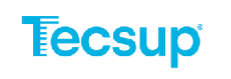

LABORATORIO 9:
NOMBRE: ARCOS ANSELMO FRANK FERNANDO RODOLFO

a) Mediante la base a datos de cáncer de mama alojados en el repositorio UCI Machine Learning
Repository
(https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) y
utilizando la librería de Python ‘scikit-learn’, cree una red neuronal para clasificar a un paciente
como canceroso o no canceroso de tal forma que obtenga el mayor valor de accuracy. Para
ello, debe realizar el preprocesamiento de la información e ir ajustando la red neuronal con los
parámetros requeridos como la cantidad de capas ocultas y neuronas por cada capa oculta, el
número de iteraciones, la función de activación, el método para minimizar la función de error,
entre otros.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape',
         'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
         'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [11]:
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [8]:
import pandas as pd

# Cargar el archivo, si lo estás leyendo
# df = pd.read_csv('your_file.csv')

# Reemplazar todos los '?' por NaN
df.replace('?', pd.NA, inplace=True)

# Eliminar las filas que tienen NaN en la columna 'bare_nuclei'
df.dropna(subset=['bare_nuclei'], inplace=True)

# Convertir a entero
df['bare_nuclei'] = df['bare_nuclei'].astype(int)


In [5]:
# Drop the id column
df = df.drop('id', axis=1)

In [6]:
# Convert class labels to numerical values (2 for benign, 4 for malignant)
# We'll map 2 to 0 and 4 to 1
df['class'] = df['class'].map({2: 0, 4: 1})

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the Neural Network
# You can experiment with different parameters here
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation='relu', solver='adam', random_state=42)

mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Neural Network: {accuracy:.4f}")

Accuracy of the Neural Network: 0.9781
